<a href="https://colab.research.google.com/github/uzair011/CN6022/blob/main/week_6_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape data for RNN (samples, timesteps, features)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

# train
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2233 - loss: 2.1108 - val_accuracy: 0.3839 - val_loss: 1.7548
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4114 - loss: 1.6899 - val_accuracy: 0.4872 - val_loss: 1.4890
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4997 - loss: 1.4759 - val_accuracy: 0.5387 - val_loss: 1.3623
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5402 - loss: 1.3669 - val_accuracy: 0.5752 - val_loss: 1.2750
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5678 - loss: 1.2840 - val_accuracy: 0.6022 - val_loss: 1.1790
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5889 - loss: 1.2196 - val_accuracy: 0.6317 - val_loss: 1.1065
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6218 - loss: 1.1339 - val_accuracy: 0.6508 - val_loss: 1.0465
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6373 - loss: 1.0821 - val_accuracy

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1370 - mae: 0.2915 - val_loss: 0.0449 - val_mae: 0.1678
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0356 - mae: 0.1475 - val_loss: 0.0207 - val_mae: 0.1115
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - mae: 0.1067 - val_loss: 0.0149 - val_mae: 0.0941
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - mae: 0.0918 - val_loss: 0.0125 - val_mae: 0.0853
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0119 - mae: 0.0839 - val_loss: 0.0113 - val_mae: 0.0807
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - mae: 0.0791 - val_loss: 0.0105 - val_mae: 0.0781
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0104 - mae: 0.0773 - val_loss: 0.0100 - val_mae: 0.0757
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0096 - mae: 0.0741 - val_loss: 0.0096 - val_mae: 0.0744
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

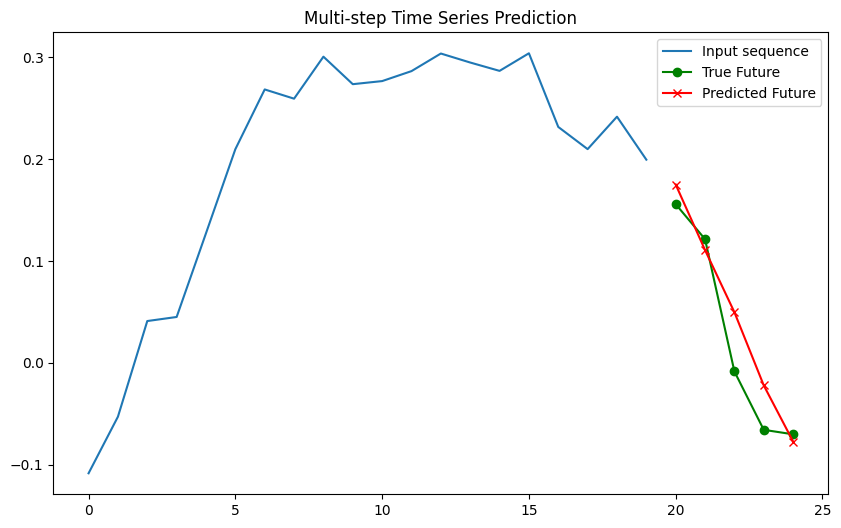

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic time series data
def generate_time_series(n_steps, n_samples=1000):
    freq1, freq2, offsets = np.random.rand(3, n_samples, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets) * (freq1 * 10 + 10))  # Wave 1
    series += 0.2 * np.sin((time - offsets) * (freq2 * 20 + 20)) # Wave 2
    series += 0.1 * (np.random.rand(n_samples, n_steps) - 0.5)   # Noise
    return series[..., np.newaxis].astype(np.float32)

# Parameters
n_steps = 100         # Total time steps per sample
n_input = 20          # Input sequence length
n_output = 5          # Number of future steps to predict
n_samples = 10000     # Number of samples
test_ratio = 0.2      # Test set ratio

# Generate and split data
series = generate_time_series(n_steps, n_samples)
X = np.zeros((n_samples, n_input, 1))
y = np.zeros((n_samples, n_output))

for i in range(n_samples):
    start = np.random.randint(0, n_steps - n_input - n_output)
    X[i] = series[i, start:start+n_input]
    y[i] = series[i, start+n_input:start+n_input+n_output, 0]

split = int(n_samples * (1 - test_ratio))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build model
model = Sequential([
    SimpleRNN(10, activation='tanh', input_shape=(n_input, 1)),
    Dense(n_output)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# Train model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                   verbose=1)

# Evaluate
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.4f}")

# Make predictions
sample_idx = np.random.randint(len(X_test))
input_series = X_test[sample_idx]
true_values = y_test[sample_idx]
predicted = model.predict(input_series[np.newaxis, ...])[0]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_input), input_series, label="Input sequence")
plt.plot(range(n_input, n_input + n_output), true_values,
         'go-', label="True Future")
plt.plot(range(n_input, n_input + n_output), predicted,
         'rx-', label="Predicted Future")
plt.legend()
plt.title("Multi-step Time Series Prediction")
plt.show()